<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/MachineLearning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

In [ ]:
def sigmoid(x):
  return 1/(1 + math.e**-x)

In [ ]:
def relu(x):
  return x if x > 0 else 0

In [ ]:
%timeit sigmoid(10)

309 ns ± 7.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%timeit relu(10)

218 ns ± 75.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
import numpy as np

In [ ]:
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([1,0,0,1])

In [ ]:
def forward(x, W ,b , activation):
  return activation(np.matmul(x, W.T)+ b)

In [ ]:
W = np.zeros((1,2))
b = 0 
Y_hat = forward(X , W , b, sigmoid)

In [ ]:
def loss(Y_hat , Y):
  return np.sum(abs(Y - Y_hat))

In [ ]:
loss(Y_hat, Y)

8.0

### Sigmoid
$$ 
\sigma = \frac{1}{1+ e ^{-z}}
$$

In [ ]:
import math
import numpy as np

In [ ]:
sigmoid = lambda z : 1 / (1+ math.e**(-z))
tanh = lambda z : math.tanh(z)
relu = lambda z: max(0,z)
lrelu = lambda z: 0.001*z if z < 0 else z

In [ ]:
dsigmoid = lambda z : sigmoid(z)*(1- sigmoid(z))
dtanh = lambda z : 1 - tanh(z)**2
drelu = lambda z: 0 if z < 0 else 1
dlrelu = lambda z: 0.001*z if z < 0 else 1

In [ ]:
def L ( y, y_hat):
  m = len(y)
  return -1/m * np.sum(y* np.log(y_hat))

In [ ]:
def forward(x, W ,b,g):
  z = []
  A = []
  z.append(np.matmul(X, W[0])+ b[0])
  A.append(g[0](z[0]))
  z.append(np.matmul(A[0],W[1]) + b[1])
  A.append(g[1](z[1]))
  return z, A


In [ ]:
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([1,0,0,1])

In [ ]:
W = [np.zeros((2,2)), np.zeros((2,1))]
b = [np.zeros((1,2)), np.zeros((1,1))]


In [ ]:
z, A = forward( X, W ,b, [sigmoid,sigmoid])

In [ ]:
1e6 * 1e6 * 16

16000000000000.0

In [ ]:
L(Y, A[-1])

1.3862943611198906

In [ ]:
def backProgation(X,Y , W , b , A ,z , gprime):
  m = len(X)
  dz = A[1] - Y
  dw = 1/m * np.matmul(A[0].T , dz)
  db = 1/m * np.sum(dz, axis = 0, keepdims = True)
  
  print(dz.shape)
  print(X.T.shape)

In [ ]:
backProgation(X,Y,W,b,A,z,[dsigmoid, dsigmoid])

(4, 4)
(2, 4)


In [ ]:
print(z)
print(A)

[array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0.],
       [0.],
       [0.],
       [0.]])]
[array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]]), array([[0.5],
       [0.5],
       [0.5],
       [0.5]])]


In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data
from keras.regularizers import L2

In [ ]:
trainsds, testds = load_data()
x_train, y_train = trainsds
x_test, y_test = testds

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


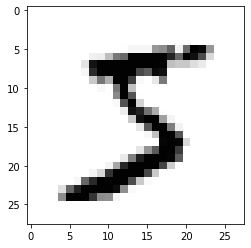

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="Greys")

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0][10:20, 10:14])

[[0.00392157 0.60392157 0.99215686 0.35294118]
 [0.         0.54509804 0.99215686 0.74509804]
 [0.         0.04313725 0.74509804 0.99215686]
 [0.         0.         0.1372549  0.94509804]
 [0.         0.         0.         0.31764706]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.15294118 0.58039216]]


In [ ]:
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu' ,kernel_regularizer =L2(0.01)),
    Dense(10, activation='softmax'),
    # Dropout()
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6154 - accuracy: 0.8961
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3993 - accuracy: 0.9272
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3604 - accuracy: 0.9373
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3386 - accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3248 - accuracy: 0.9444
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3125 - accuracy: 0.9466
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3052 - accuracy: 0.9483
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2960 - accuracy: 0.9496
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2879 - accuracy: 0.9515
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.282

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2576 - accuracy: 0.9598


[0.25755420327186584, 0.9598000049591064]

In [ ]:
y_hat = model.predict(x_test)


In [ ]:
y_hat = y_hat.argmax(axis=1)


In [ ]:
import sklearn.metrics as metrics
import seaborn as sns

In [ ]:
cm = metrics.confusion_matrix(y_test, y_hat)
print(cm)

[[ 968    1    1    1    0    3    2    1    2    1]
 [   0 1120    5    2    0    1    3    0    4    0]
 [   5    0  996    5    3    3    7    7    6    0]
 [   1    0   10  977    0    3    0    8    4    7]
 [   2    0    1    0  927    1    7    1    2   41]
 [   5    1    1   23    2  846    6    1    3    4]
 [  12    3    2    1    5   13  918    0    4    0]
 [   2    9   21    1    3    1    0  980    0   11]
 [  12    1    5   10    6   11    5   12  898   14]
 [   5    5    4    9    6    3    1    5    3  968]]


In [ ]:
test = [[ 969   , 0  ,  2    ,0  ,  1   , 0 ,   2   , 1   , 5  ,  0],
 [   0 ,1127   , 2    ,1  ,  0   , 0 ,   1   , 0   , 4  ,  0],
 [   3 ,   4 ,1004   , 3  ,  1   , 0 ,   2   , 9   , 6  ,  0],
 [   1  ,  0   , 2  ,996   , 0   , 3 ,   0   , 3   , 2  ,  3],
 [   1  ,  0   , 2  ,  1  ,963  ,  0 ,   4   , 2   , 0  ,  9],
 [   2  ,  0   , 0  ,  8   , 1  ,870 ,   3   , 1   , 5  ,  2],
 [   4  ,  3   , 1  ,  1   , 6  ,  4 , 936   , 0   , 3  ,  0],
 [   1  ,  3   , 9  ,  1   , 1  ,  0 ,   0 ,1008   , 1  ,  4],
 [   2  ,  1   , 3  ,  5   , 5  ,  1 ,   0 ,   4 , 951  ,  2],
 [   1  ,  6   , 0   , 5   , 9  ,  1 ,   0 ,   5  ,  3 , 979]],

In [ ]:
y_hat = model.predict(x_test)
metrics.top_k_accuracy_score(y_test, y_hat, k=3)

0.995

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics
import seaborn as sns 
import pandas as pd
import numpy as np
import graphviz as gv

In [ ]:
url="https://raw.githubusercontent.com/lmcanavals/ml/main/data/iris.data"


In [ ]:
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data = data.iloc[np.random.permutation(len(data))]
X_train = data.iloc[:80,0:3]
Y_train = data.iloc[:80,4]
X_val = data.iloc[80:,0:3]
Y_val = data.iloc[80:,4]


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

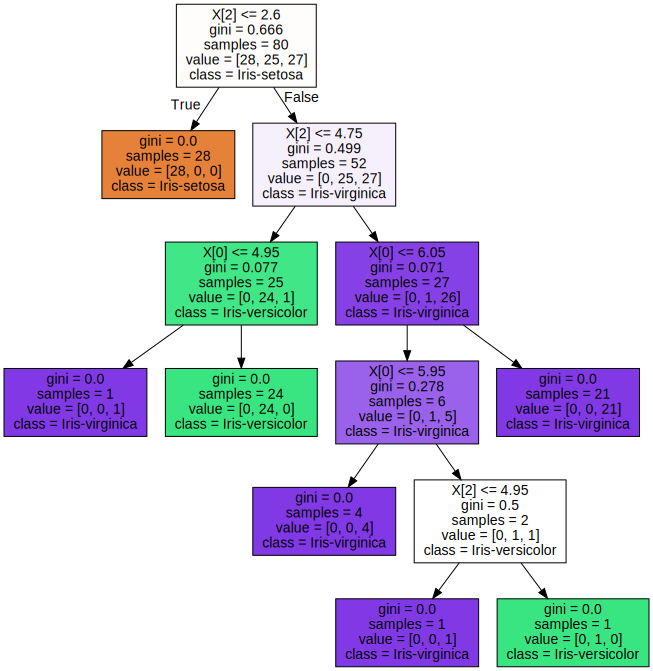

In [ ]:
g = export_graphviz(model, class_names=Y.unique(), filled=True)
gv.Source(g)

In [ ]:
y_hat = model.predict(X_val)


In [ ]:
cm = metrics.confusion_matrix(Y_val,y_hat)
print(cm)

[[22  0  0]
 [ 0 19  6]
 [ 0  1 22]]


### Predecir la iris setosa

In [ ]:
import tensorflow as tf


In [ ]:
data = data.replace({'Iris-setosa': 0 ,'Iris-virginica':2, 'Iris-versicolor':1})

In [ ]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X= data.iloc[:150 , 0:4]
Y = data.iloc[:150, 4]
#X_test= data.iloc[:150 , 0:4]
#Y_test = data.iloc[:150:, 4]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
Y_train

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 4, Length: 150, dtype: int64

In [ ]:
model = keras.Sequential([
    Dense(100,input_shape=(4,), activation = "relu"),
    Dense(3,activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.8857
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.9238
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8952
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.8762
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8381
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8286
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.8667
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.9429
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.9429
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.8762
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3805 - accuracy: 0.9556


[0.3805140554904938, 0.9555555582046509]

In [ ]:
data.head

<bound method NDFrame.head of        0    1    2    3  4
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
..   ...  ...  ...  ... ..
145  6.7  3.0  5.2  2.3  2
146  6.3  2.5  5.0  1.9  2
147  6.5  3.0  5.2  2.0  2
148  6.2  3.4  5.4  2.3  2
149  5.9  3.0  5.1  1.8  2

[150 rows x 5 columns]>

In [ ]:
a = x_test[:1]

In [ ]:
print()

      0    1    2    3
92  5.8  2.6  4.0  1.2


In [ ]:
s = model.predict(a)

In [ ]:
p=np.argmax(s, axis=1)
print(p)
print(y_test[:10])

[1]
92     1
132    2
5      0
81     1
59     1
57     1
29     0
128    2
74     1
53     1
Name: 4, dtype: int64


In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/lmcanavals/ml/main/data/golf-dataset.csv"


In [ ]:
data = pd.read_csv(url)
data.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
print(data)

     Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overcast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overcast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No


## Entropy

$$ 
E(s) = \sum_{i=1}^{c} (-p_i  x log_2 (p_i))
$$

##Entropy +1 data

$$
E(s,x) = \sum_{c \in X} (P(c)E(c))
$$

In [ ]:
import math

In [ ]:
def E(data,s):
  classes = data[s].unique()
  m = len(data)
  #print(m)
  n = len(classes)
  p = [0]*n
  for i in range(n):
    p[i] = len(data[data[s]== classes[i]]) / m 
  e = 0
  for pi in p:
    e += -pi* math.log2(pi)
  return e
E(data, "Play Golf")

0.9402859586706309

In [ ]:
datacoin = pd.DataFrame([{"outcome": "cara"},
                         {"outcome": "sello"},
                         {"outcome": "cara"},
                         {"outcome": "sello"},
                         {"outcome": "cara"},
                         {"outcome": "sello"},
                         {"outcome": "cara"},
                         {"outcome": "sello"},
                         ])


datacoin

,outcome
0,cara
1,sello
2,cara
3,sello
4,cara
5,sello
6,cara
7,sello


In [ ]:
E(datacoin,"outcome")

8


1.0

In [ ]:
def Ex(data,s,x):
  classesX = data[x].unique()
  print(classesX)
  m = len(data)
  n = len(classesX)
  print(m,n)
  pX = [0]*n
  Es = [0]*n
  for i in range(len(classesX)):
    pX[i] = len(data[data[x]== classesX[i]])  / m
    print(data[data[x]== classesX[i]])
    Es[i] = E(data[data[x] == classesX[i]], s)
    print(f"{classesX[i]} -> {pX[i]} -> {Es[i]}")

  e = 0
  for i in range(n):
    e += pX[i]*Es[i]
  
  return e

In [ ]:
Ex(data, "Play Golf", "Outlook")

['Rainy' 'Overcast' 'Sunny']
14 3
   Outlook  Temp Humidity  Windy Play Golf
0    Rainy   Hot     High  False        No
1    Rainy   Hot     High   True        No
7    Rainy  Mild     High  False        No
8    Rainy  Cool   Normal  False       Yes
10   Rainy  Mild   Normal   True       Yes
Rainy -> 0.35714285714285715 -> 0.9709505944546686
     Outlook  Temp Humidity  Windy Play Golf
2   Overcast   Hot     High  False       Yes
6   Overcast  Cool   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
Overcast -> 0.2857142857142857 -> 0.0
   Outlook  Temp Humidity  Windy Play Golf
3    Sunny  Mild     High  False       Yes
4    Sunny  Cool   Normal  False       Yes
5    Sunny  Cool   Normal   True        No
9    Sunny  Mild   Normal  False       Yes
13   Sunny  Mild     High   True        No
Sunny -> 0.35714285714285715 -> 0.9709505944546686


0.6935361388961918

## Information Gain

$$
IG (s,X) = E(s) - E(s,X)
$$

## Gini index

$$
Gini = 1- \sum_{i = 1}^{c} p_i^2
$$

In [ ]:
for attr in data:
  print(Ex(data, "Play Golf", attr))

## KNN , Nearest Neighbours

In [ ]:
import numpy as np

In [ ]:
data = np.random.random((100,3))
data[:50, 2] =0
data[50:,2 ] = 1
np.random.shuffle(data[:])

In [ ]:
data

In [ ]:
import matplotlib.pyplot as plt

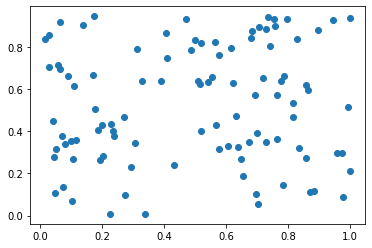

In [ ]:
plt.scatter(data[:,0],data[:,1])

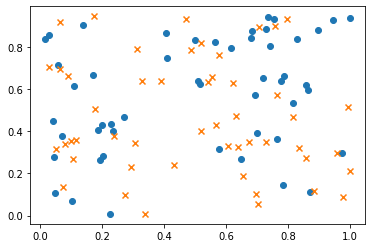

In [ ]:
caret = ['o','x']
# plt.subplots(figsize= (10,10))
for i in range(2):
  temp = data[data[:,2] == i]
  plt.scatter(temp[: ,0], temp[:, 1], marker=caret[i])

### Euclidean
$$
P = (x_0,x_1,x_2 .. x_{n-1})
$$


$$
d(p^{[0]},p^{[1]}) = \sqrt{\sum_{i=0}^{n-1}(x_0^{[0]}-x_i^{[1]})^2}
$$

In [ ]:
def euclidean(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += (p0[i] - p1[i])**2
   return math.sqrt(d)

In [ ]:
euclidean([1,1], [2,2])

1.4142135623730951

### Manhattan
$$
P = (x_0,x_1,x_2 .. x_{n-1})
$$


$$
d(p^{[0]},p^{[1]}) = {\sum_{i=0}^{n-1}\| x_0^{[0]}-x_i^{[1]}|}
$$

In [ ]:
def manhattan(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += abs(p0[i] - p1[i])
   return d

In [ ]:
manhattan([1,1], [2,2])

2

### cosine similarity

In [ ]:
def cosinesim(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += p0[i]*p1[i]
   #print(d)
   p00 = po(p0)
   p11 = po(p1)
   #print(p00,p11)

   return d/(p00*p11)

def po(p):
  d = 0
  n = len(p)
  for i in range(n):
    d += p[i]**2
  return math.sqrt(d)

In [ ]:
cosinesim([1,4], [2,4])

0.9761870601839528